In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [99]:
columns_lists = [['a0_m', 's_m', 'b0_m', 'delta_m'], 
                 ['a0_h', 's_h', 'b0_h', 'delta_h'],
                 ['tau_j_const', 'a0_j', 's_j', 'b0_j', 'delta_j'],
                 ]

In [100]:
df_all = pd.read_csv("../results/valid_ps.csv",
                    # usecols=columns,
                    )

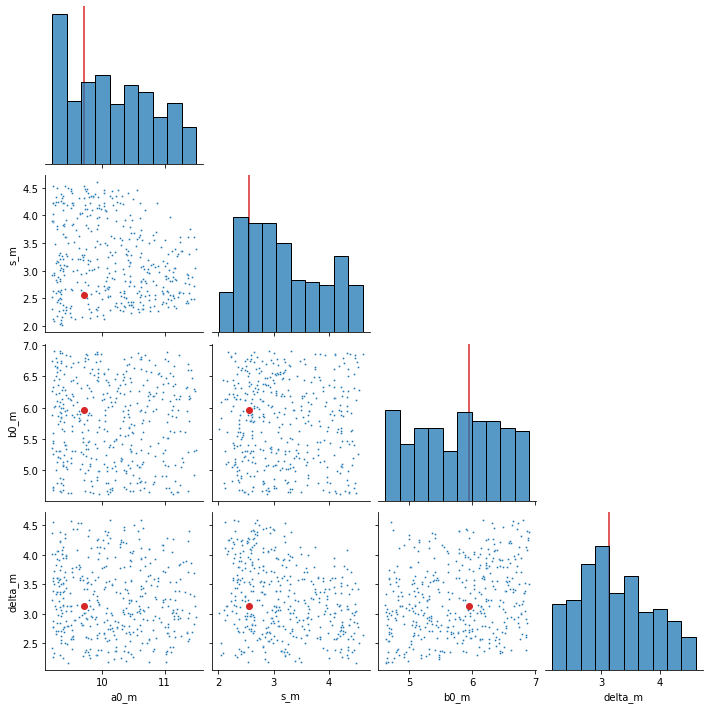

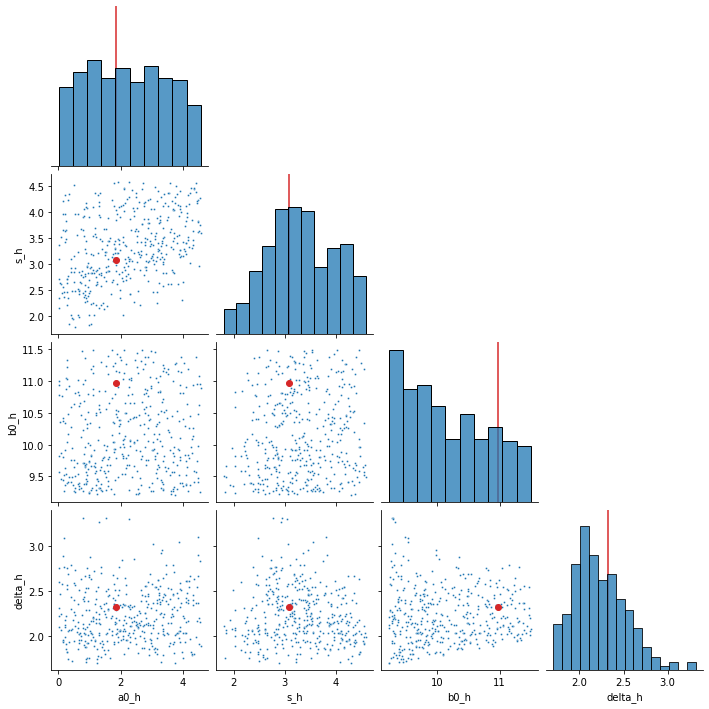

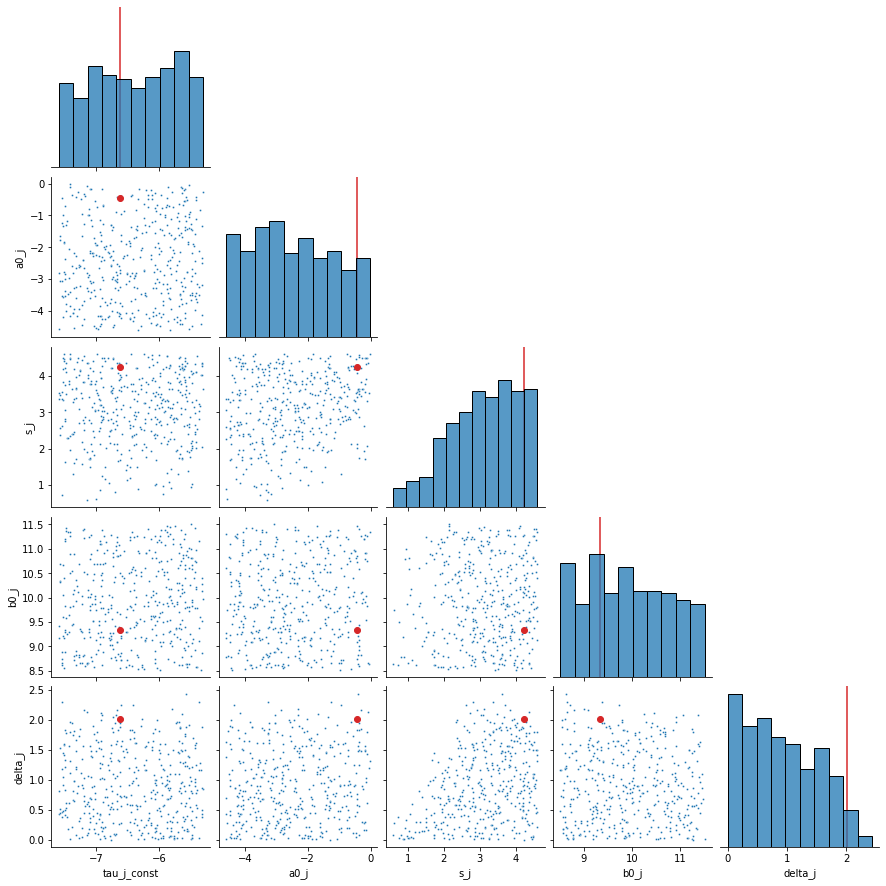

In [101]:
for columns in columns_lists:
    df = df_all[columns]

    pg = sns.pairplot(df, corner=True, plot_kws=dict(marker='.', s=16, alpha=1))

    for ix, cx in enumerate(columns[:-1]):
        for iy in range(ix + 1, len(columns)):
            cy = columns[iy]
            ax = pg.axes[iy, ix]
            ax.plot(df[cx].iloc[-1],
                    df[cy].iloc[-1], 'o', color='C3')

    for i, c in enumerate(columns):
            ax = pg.axes[i, i]
            ax.axvline(df[c].iloc[-1], color='C3')
            
    plt.show()

In [102]:
pipe = make_pipeline(StandardScaler(), PCA())
df_pca = pd.DataFrame(pipe.fit_transform(df))

exp_var = (pipe['pca'].explained_variance_ratio_ * 100).astype(int)
exp_var

array([28, 22, 18, 17, 12])

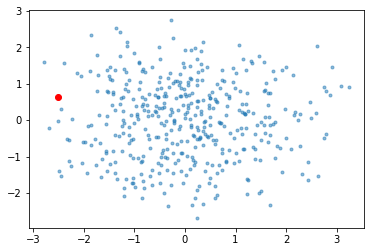

In [105]:
plt.plot(df_pca[0], df_pca[1], '.', alpha=0.5)
plt.plot(df_pca[0].iloc[-1], df_pca[1].iloc[-1], 'or')